**INTRODUCTION**

Exploratory data analytics requires understanding of data and how different variables are correlated. 
To understand the data using python data visualization and pandas we will be taking a case study of bank loan applications data. 

The bank applications data has a dependent variable named TARGET variable whose value is 1 when the applicant is a defaulter and have missed the replayment of loan. For other applicants this value will be 0. All other columns in the data are considered independent variables. 

We will explore the data step by step, visualize the data, create count/count percentage and summary tables and see how different variables like age, credit ratings, income etc of the applicant varies with the TARGET variable.

The following steps will be covered in the tutorial

1.	Getting the data ready<br><br>
1.1	Understanding the data<br>
1.2	Cleaning data by dropping unwanted rows and columns<br>
1.3	Handling missing values<br>
1.4	Handling outliers<br>
1.5	Changing the data types of columns<br>
1.6	Changing column names into meaningful ones for analysis. <br>
1.7	Creating derived variables and binning the data. <br>
1.8	Understanding the data imbalance<br>

2.	Data Analysis<br>
2.1	Univariate Analysis<br>
2.1.1	Categorical<br>
2.1.2	Numerical<br>
2.2	  Bivariate  Analysis<br>
2.2.1  Categorical  & Categorical<br>
2.2.2	Numerical & Numerical<br>
2.2.3	Categorical & Numerical<br>
    
**Note**
* Kindly go through the code comments for details.
* As we explore the data, I have added the Analysis and conclusion that we can make out with the plots and summary tables.
* For the understanding of concepts, I have just taken 3 to 4 variables at a time for analysis . You can extend the analysis for other variables in the similar fashion.
* This is just the beginning and not the exhaustive exploration. Feel free to leave suggestions in the comments section.

##  1. Getting the data ready

This is the first and most important step in data analysis. Usually there are large number of columns, redundant rows and missing values in a data. Its is very important to clean the data before performing any analysis.

   ## 1.1 Understanding the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_rows', 500)
#df = pd.read_csv("application_data.csv")
df = pd.read_csv("/kaggle/input/application_data.csv")
#Sanity checks on the data
df.head()
df.info()
df.shape
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


(307511, 122)

## 1.2	Cleaning data by dropping unwanted rows and columns

In [2]:
# sum it up to check how many rows have all missing values
df.isnull().all(axis=1).sum()

0

In [3]:
# % of the missing values (column-wise)
col_missing_perc = round(100*(df.isnull().sum()/len(df.index)), 2) 

In [4]:
#getting cols with more than 20% missing and dropping them
col_missing_perc_greater_20 = []
for i in range(0,len(col_missing_perc)):
    if col_missing_perc[i]>20:
        col_missing_perc_greater_20.append(col_missing_perc.index[i])
    
#dropping cols with more than 20% missing
df.drop(col_missing_perc_greater_20, axis = 1,inplace=True)

In [5]:
#remaining columns
df.shape

(307511, 72)

Of the remaining columns with < 20% missing data,a detailed analysis has been done to pick the below 24 columns for further analysis.

In [6]:
#subsetting the data
df=df[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'CODE_GENDER',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS',
'NAME_HOUSING_TYPE',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'CNT_FAM_MEMBERS',
'ORGANIZATION_TYPE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'EXT_SOURCE_2'
]]
##final list of columns for analysis
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'EXT_SOURCE_2'],
      dtype='object')

In [7]:
#checking missing % in remaining columns
round(100*(df.isnull().sum()/len(df.index)), 2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
CNT_FAM_MEMBERS                0.00
ORGANIZATION_TYPE              0.00
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
EXT_SOURCE_2                   0.21
dtype: float64

## 1.3	Handling missing values

The below columns have been chosen to showcase the imputation of missing values from the subset of the data selected.

a) ORGANIZATION_TYPE - Unordered Categorical variable.<br>
b) CODE_GENDER - Unordered Categorical variable.<br>
c) CNT_FAM_MEMBERS - Ordered categorical variable.<br>

For the above variables,MODE has been used to impute the missing data as the data is categorical in nature and mode represents the most common category.
       
For the continuous numerical value,MEAN or MEDIAN is usually used to impute the missing data. When the data is normally distributed without any large number of outliers, taking the mean would be the best option. But sometimes when the data is not normally distributed, example, there might be few applicants with extraordinary large income. In such cases the distribution will be skewed and taking MEDIAN to impute the missing value will be the best option.

In [8]:

#1.Handling missing values -  Categorical

df['ORGANIZATION_TYPE']=np.where(df['ORGANIZATION_TYPE'].isnull(),df['ORGANIZATION_TYPE'].mode(),df['ORGANIZATION_TYPE']) 
df['CODE_GENDER']=np.where(df['CODE_GENDER']=='XNA',df['CODE_GENDER'].mode(),df['CODE_GENDER'])



df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_HOUR']), ['AMT_REQ_CREDIT_BUREAU_HOUR']] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_DAY']),['AMT_REQ_CREDIT_BUREAU_DAY']]=df['AMT_REQ_CREDIT_BUREAU_DAY'].median()
df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_WEEK']),['AMT_REQ_CREDIT_BUREAU_WEEK']]=df['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_MON']),['AMT_REQ_CREDIT_BUREAU_MON']]=df['AMT_REQ_CREDIT_BUREAU_MON'].median()
df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_QRT']),['AMT_REQ_CREDIT_BUREAU_QRT']]=df['AMT_REQ_CREDIT_BUREAU_QRT'].median()
df.loc[np.isnan(df['AMT_REQ_CREDIT_BUREAU_YEAR']),['AMT_REQ_CREDIT_BUREAU_YEAR']]=df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()

#1.Handling missing values -  Numerical
df.loc[np.isnan(df['CNT_FAM_MEMBERS']),['CNT_FAM_MEMBERS']]=df['CNT_FAM_MEMBERS'].median()
df.loc[np.isnan(df['AMT_ANNUITY']),['AMT_ANNUITY']]=round(df['AMT_ANNUITY'].median(),1)

In [9]:
#checking missing % in remaining columns
round(100*(df.isnull().sum()/len(df.index)), 2)

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.09
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
CNT_FAM_MEMBERS               0.00
ORGANIZATION_TYPE             0.00
AMT_REQ_CREDIT_BUREAU_HOUR    0.00
AMT_REQ_CREDIT_BUREAU_DAY     0.00
AMT_REQ_CREDIT_BUREAU_WEEK    0.00
AMT_REQ_CREDIT_BUREAU_MON     0.00
AMT_REQ_CREDIT_BUREAU_QRT     0.00
AMT_REQ_CREDIT_BUREAU_YEAR    0.00
EXT_SOURCE_2                  0.21
dtype: float64

<b>We still have 0.21% of EXT_SOURCE_2 missing. As it is very less percentage, the rows with null value of EXT_SOURCE_2 has been deleted. Also EXT_SOURCE_2 is the credit rating of an applicant and is an important column for performing analysis on it is better to delete rather than imputing with an incorrect value. 

In [10]:
df = df.dropna(axis=0, subset=['EXT_SOURCE_2'])

In [11]:
round(100*(df.isnull().sum()/len(df.index)), 2)

SK_ID_CURR                    0.00
TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
AMT_GOODS_PRICE               0.09
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
DAYS_BIRTH                    0.00
DAYS_EMPLOYED                 0.00
CNT_FAM_MEMBERS               0.00
ORGANIZATION_TYPE             0.00
AMT_REQ_CREDIT_BUREAU_HOUR    0.00
AMT_REQ_CREDIT_BUREAU_DAY     0.00
AMT_REQ_CREDIT_BUREAU_WEEK    0.00
AMT_REQ_CREDIT_BUREAU_MON     0.00
AMT_REQ_CREDIT_BUREAU_QRT     0.00
AMT_REQ_CREDIT_BUREAU_YEAR    0.00
EXT_SOURCE_2                  0.00
dtype: float64

In [12]:
df.shape

(306851, 24)

#### 0.09% of missing value of AMT_GOODS_PRICE will be handled after removal of outliers in the data.

## 1.4	Handling outliers

Identification and handling of outliers has been done on the 3 columns - 'AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT' for which the quantile range of 25-75% has been considered.

It is important to understand that extremely high value is not always outlier. In some cases extremely high or extremely low  value can indicate the missing information (eg: -999999 or 999999 in case of numerical data)
Here in our case outliers have been chosen for removal in order to calculate mean value of columns. Ouliers in our case are rare occurances and may misrepresent the dataset if considered for analysis.


In [13]:
# Identifying and treating Outliers on columns - AMT_ANNUITY,AMT_GOODS_PRICE,AMT_CREDIT


df_outliers=df[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT']]
#df_outliers.shape (306574, 3)--before outlier removal
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)

IQR=Q3-Q1
print(IQR)

#in case you decide to remove outliers, follow the below command.
df_out_final=df_outliers[~((df_outliers < (Q1-1.5*IQR)) | (df_outliers > ((Q3 + 1.5*IQR)))).any(axis=1)]


# The mean value will be used further to impute missing value in the respective columns
df_out_final['AMT_GOODS_PRICE'].mean() 


AMT_ANNUITY         18054.0
AMT_GOODS_PRICE    441000.0
AMT_CREDIT         538650.0
dtype: float64


481901.14979259594

In [14]:
len(df_out_final.index)/len(df.index)

0.9397329648591661

This shows that 7% of the data is having outliers for AMT_GOODS_PRICE and AMT_GOODS_PRICE. Therefore, these rows are not entirely deleted from the dataset and only missing values for AMT_GOODS_PRICE are imputed by calculating mean after removing the outliers.

In [15]:
#imputing missing value of AMT_GOODS_PRICE with mean of data after removing the outlier
df.loc[np.isnan(df['AMT_GOODS_PRICE']),['AMT_GOODS_PRICE']]=round(df_out_final['AMT_GOODS_PRICE'].mean(),1)

In [16]:
## verification of the fixes
round(100*(df.isnull().sum()/len(df.index)), 2)

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
CNT_FAM_MEMBERS               0.0
ORGANIZATION_TYPE             0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
EXT_SOURCE_2                  0.0
dtype: float64

#### We can now confirm now that we do not have any missing values and continue further with analysis.

## 1.5	Changing the data types of columns

The following columns had integer data but the datatype is float.The below code converts them to int.

In [17]:
#changing datatype of the columns
dt_dict={'AMT_REQ_CREDIT_BUREAU_HOUR':int,
        'CNT_FAM_MEMBERS':int,
        'AMT_REQ_CREDIT_BUREAU_WEEK':int,
        'AMT_REQ_CREDIT_BUREAU_MON':int,
        'AMT_REQ_CREDIT_BUREAU_DAY':int,
        'AMT_REQ_CREDIT_BUREAU_QRT':int,
        'AMT_REQ_CREDIT_BUREAU_YEAR':int}

df=df.astype(dt_dict)


# checking the datatypes
df.info()
   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306851 entries, 0 to 307510
Data columns (total 24 columns):
SK_ID_CURR                    306851 non-null int64
TARGET                        306851 non-null int64
NAME_CONTRACT_TYPE            306851 non-null object
CODE_GENDER                   306851 non-null object
CNT_CHILDREN                  306851 non-null int64
AMT_INCOME_TOTAL              306851 non-null float64
AMT_CREDIT                    306851 non-null float64
AMT_ANNUITY                   306851 non-null float64
AMT_GOODS_PRICE               306851 non-null float64
NAME_INCOME_TYPE              306851 non-null object
NAME_EDUCATION_TYPE           306851 non-null object
NAME_FAMILY_STATUS            306851 non-null object
NAME_HOUSING_TYPE             306851 non-null object
DAYS_BIRTH                    306851 non-null int64
DAYS_EMPLOYED                 306851 non-null int64
CNT_FAM_MEMBERS               306851 non-null int64
ORGANIZATION_TYPE             306851 non-nu

## 1.6	Changing column names into meaningful ones for analysis.

In [18]:
#removing unnecessary spaces in column names
df.columns=[df.columns[i].strip() for i in range(len(df.columns))]

#renaming columns
df.rename(columns={"EXT_SOURCE_2": "CREDIT_RATINGS"},inplace=True)

## 1.7	Creating derived variables and binning the data.

Two columns have been chosen for binning,namely

DAYS_BIRTH<br>
CREDIT_RATINGS

From the DAYS_BIRTH, AGE of the client is calculated and then AGE_GROUPS are formed based on the age.


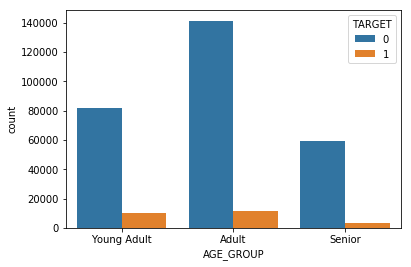

In [19]:
#Categorising customers into following
#Youth (<18)
#Young Adult (18 to 35)
#Adult (36 to 55)
#Senior (56 and up)

df['AGE'] = abs(df['DAYS_BIRTH'])
df['AGE'] = round(df['AGE']/365,1)
df['AGE']

df['AGE'].describe()
def age_group(y):
    if y>=56:
        return "Senior"
    elif y>=36 and y<56:
        return "Adult"
    elif y>=18 and y<36:
        return "Young Adult"
    else:
        return "Youth"
    
df['AGE_GROUP'] = df['AGE'].apply(lambda x: age_group(x))

sns.countplot(x='AGE_GROUP',hue='TARGET',data=df)

Just a quick analysis from above plot: Seniors for less likely to be a defaulter in replaying the loan.

<b> Binning CREDIT_RATINGS based on quantiles </b>
<br>
The credit rating is being categorized ino C1,C2,C3 and C4, where C1 category is the highest.
The categorization is done based on the quantiles.

In [20]:
df['CREDIT_RATINGS'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.170000e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: CREDIT_RATINGS, dtype: float64

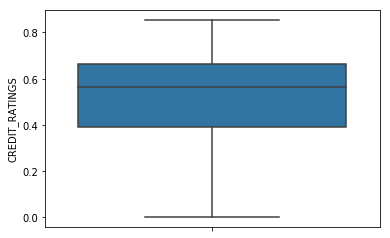

In [21]:
sns.boxplot(y=df['CREDIT_RATINGS'])

In [22]:
credit_category_quantile = list(df['CREDIT_RATINGS'].quantile([0.20,0.5,0.80,1]))
credit_category_quantile

[0.33982165700000005, 0.565961426, 0.682064052, 0.854999666]

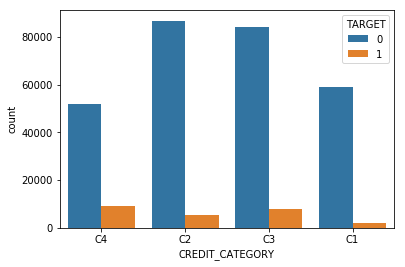

In [23]:
def credit_group(x):
    if x>=credit_category_quantile[2]:
        return "C1"
    elif x>=credit_category_quantile[1]:
        return "C2"
    elif x>=credit_category_quantile[0]:
        return "C3"
    else:
        return "C4"
df["CREDIT_CATEGORY"] = df['CREDIT_RATINGS'].apply(lambda x: credit_group(x))

sns.countplot(x='CREDIT_CATEGORY',hue='TARGET',data=df)

## 1.8	Understanding the data imbalance

In [24]:
df['TARGET'].value_counts(normalize=True)

0    0.919267
1    0.080733
Name: TARGET, dtype: float64

<b> There is an imbalance in the data where only 8% clients are with payment difficulties and 91% clients are all others.

## 2.	Data Analysis

Before performing analysis, you need to identify the variables as categorical variable or numerical variable. 

In [25]:
#checking for unique values per column to see what all columns can be categorised
df.nunique().sort_values()

TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
AGE_GROUP                          3
CREDIT_CATEGORY                    4
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_YEAR        25
ORGANIZATION_TYPE                 58
AGE                              483
AMT_GOODS_PRICE                 1003
AMT_INCOME_TOTAL                2546
AMT_CREDIT                      5603
DAYS_EMPLOYED                  12573
AMT_ANNUITY                    13669
DAYS_BIRTH                     17460
CREDIT_RATINGS                119828
SK_ID_CURR                    306851
d

From above we can see that there are variables above AGE can be considered as categorical variable (as unique values for them is very less compared to length of the data) and rest as contiuous variables.

#### Dividing the data based on the dependent variable (TARGET) for further analysis

In [26]:
df0 = df[df['TARGET']==0]
df1 = df[df['TARGET']==1]


## 2.1 Univariate Analysis
Done to check the impact of one independent variable on a dependent variable

In [27]:
# What are average values of numerical features
df.pivot_table(columns = 'TARGET', aggfunc = 'median')

TARGET,0,1
AGE,43.500000,39.100000
AMT_ANNUITY,24885.000000,25294.500000
AMT_CREDIT,517927.500000,497520.000000
AMT_GOODS_PRICE,450000.000000,450000.000000
AMT_INCOME_TOTAL,148500.000000,135000.000000
AMT_REQ_CREDIT_BUREAU_DAY,0.000000,0.000000
AMT_REQ_CREDIT_BUREAU_HOUR,0.000000,0.000000
AMT_REQ_CREDIT_BUREAU_MON,0.000000,0.000000
AMT_REQ_CREDIT_BUREAU_QRT,0.000000,0.000000
AMT_REQ_CREDIT_BUREAU_WEEK,0.000000,0.000000


## 2.1.1 Univariate Analysis for Categorical Variable

    o	Need to check: Counts/Count% 
    o	Plots: bar-charts, stacked bar charts


In [28]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

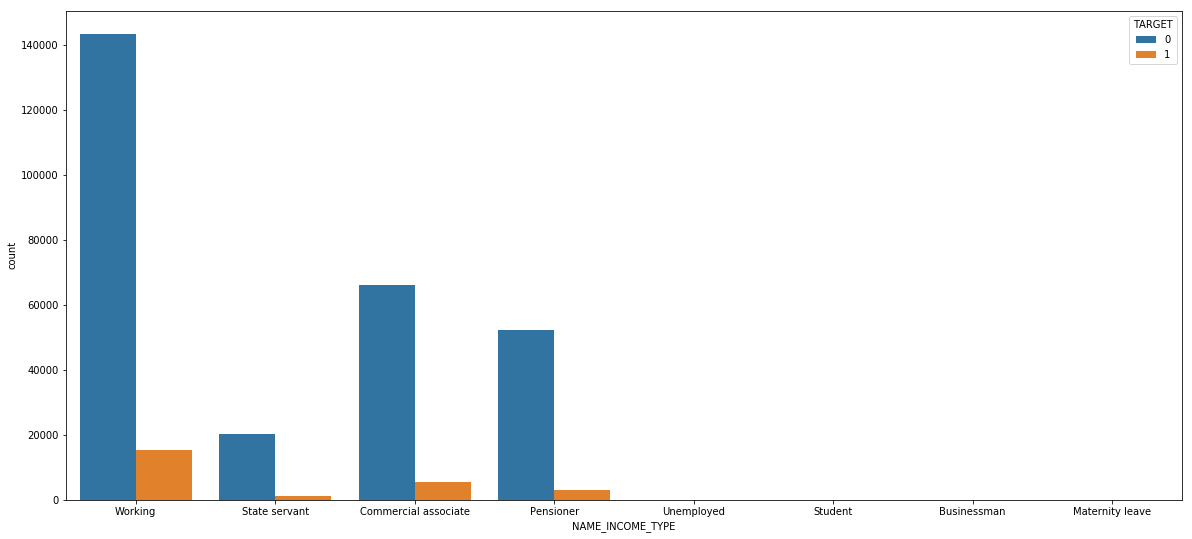

In [29]:
plt.figure(figsize=(20,9))
sns.countplot(x='NAME_INCOME_TYPE',hue='TARGET',data=df)


##### As there is huge data imbalance, converting the numbers into percentages and using them for plots and analyzing

In [30]:
incomeCategories0 = pd.DataFrame(df0['NAME_INCOME_TYPE'].value_counts().rename("Count_0").reset_index())
incomeCategories0_perct = pd.DataFrame(df0['NAME_INCOME_TYPE'].value_counts(normalize=True).rename("Perct_0").reset_index())
incomeCategories0.rename(columns={"index":"NAME_INCOME_TYPE"})
incomeCategories0_perct.rename(columns={"index":"NAME_INCOME_TYPE"})

#Merging data to get the overall view of the variable "NAME_INCOME_TYPE"
incomeCategories0 = pd.merge(incomeCategories0,incomeCategories0_perct,how="inner").rename(columns={"index":"NAME_INCOME_TYPE"})
incomeCategories0

incomeCategories1 = pd.DataFrame(df1['NAME_INCOME_TYPE'].value_counts().rename("Count_1").reset_index())
incomeCategories1_perct = pd.DataFrame(df1['NAME_INCOME_TYPE'].value_counts(normalize=True).rename("Perct_1").reset_index())
incomeCategories1.rename(columns={"index":"NAME_INCOME_TYPE"})
incomeCategories1_perct.rename(columns={"index":"NAME_INCOME_TYPE"})

#Merging data to get the overall view of the variable "NAME_INCOME_TYPE"
incomeCategories1 = pd.merge(incomeCategories1,incomeCategories1_perct,how="inner").rename(columns={"index":"NAME_INCOME_TYPE"})
incomeCategories1

incomeCategories = pd.merge(incomeCategories0,incomeCategories1,how="inner").rename(columns={"index":"NAME_INCOME_TYPE"})

def income_percentage_contri_0(count_0, count_1):
    return 100*(count_0/(count_0+count_1))

def income_percentage_contri_1(count_0, count_1):
    return 100*(count_1/(count_0+count_1))

incomeCategories['percentage_contri_0'] = incomeCategories[['Count_0','Count_1']].apply(lambda x: income_percentage_contri_0(*x), axis=1)
incomeCategories['percentage_contri_1'] = incomeCategories[['Count_0','Count_1']].apply(lambda x: income_percentage_contri_1(*x), axis=1)
incomeCategories.set_index("NAME_INCOME_TYPE",inplace=True)
incomeCategories

,Count_0,Perct_0,Count_1,Perct_1,percentage_contri_0,percentage_contri_1
NAME_INCOME_TYPE,,,,,,
Working,143269,0.507906,15190,0.613168,90.413924,9.586076
Commercial associate,66125,0.234421,5351,0.216001,92.513571,7.486429
Pensioner,52231,0.185165,2975,0.120090,94.611093,5.388907
State servant,20408,0.072349,1247,0.050337,94.241515,5.758485
Unemployed,14,0.000050,8,0.000323,63.636364,36.363636
Maternity leave,3,0.000011,2,0.000081,60.000000,40.000000


For the above table the column description is:
    
    Count_0 = Total number of non defaulters applicants which belong to that particular income type.
              Ex: There are total 143550 non defaulter applicants that have "Working" as their income type.
    
    Count_1 = Total number of defaulter applicants which belong to that particular income time.
              Ex: There are total 15224 defaulter applicants that have "Working" as their income type.
    
    Perct_0 = How much percentage the particular category contibutes to all the non defaulter applicants. Target = 0
              Ex: Out of total applicants of Target=0, 50% of them have "Working" as their income type.
    
    Perct_1 = How much percentage the particular category contibutes to all the defaulter applicants. Target=1
              Ex: Out of total applicants of Target=1, 61% of them have "Working" as their income type.
    
    percentage_contri_0 = Out of all the applicants with the particular category, how much percentage belong to Target=0
              Ex: Out of total working applicants, 90% are those with Target =0 
    
    percentage_contri_1 = Out of all the applicants with the particular category, how much percentage belong to Target=1
              Ex: Out of total working applicants, 9.5% are those with Target =1.
              
              
#### Similar table with these columns will be used for analysis of other variables
            

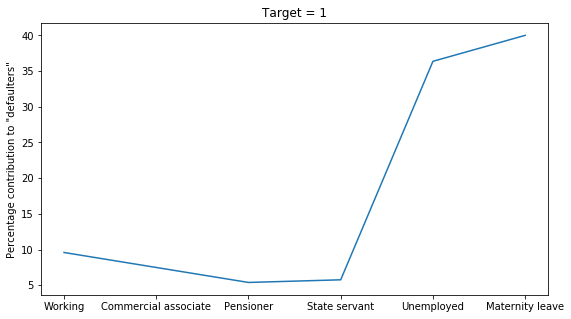

In [31]:
fig = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Target = 1")
plt.ylabel('Percentage contribution to "defaulters"')
plt.plot(incomeCategories['percentage_contri_1'])
#ax1.set_xticklabels(labels = ax1.get_xticklabels(),rotation=30)


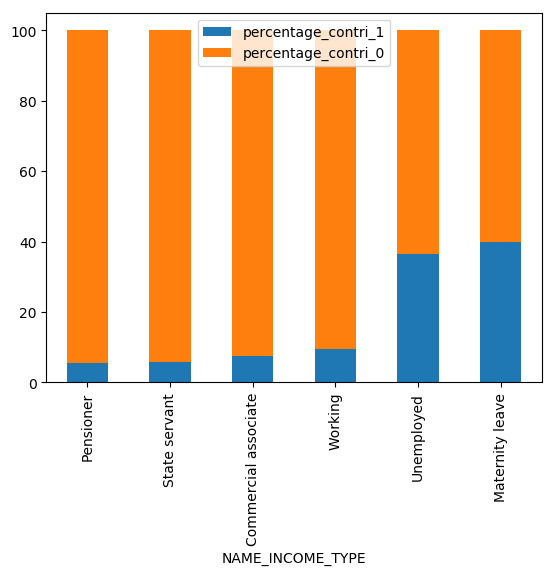

In [32]:
plt.rcParams.update(plt.rcParamsDefault)
incomeCategories = incomeCategories.sort_values(by='percentage_contri_1')
incomeCategories[['percentage_contri_1', 'percentage_contri_0']].plot(kind='bar', stacked=True)

## Analysis:
Ignoring Income type "Unemployed" and "Maternity Leave" as the data is very less.

The percentage of working people is maximum among the applicants.

Out of income type "Working", "Commercial associate","Pensioners" and "state_servants", Pensioners are highly likely to repay their loans on time.

Out of all pensioners who applied for the loan, there is <b>94.6% </b>chance that he will repay the loan and <b>5.3% </b>that he will default.

Similarly out of all the working applicants, there is <b>90.4%</b> chance that he will repay the loan and <b>9.5%</b> chance that he will default.

#### Therefore, the total impact of income type on the defaulters is 4.2% (9.58% being the max and 5.3% being the worst.)
#### So if we want to consider applicants, applicants with income type as pensioners should be given the highest priority.

<b> Let us consider an another variable categorical variable CODE_GENDER - the gender of the applicant and see how the gender of a person impacts the target variable. 

In [33]:
df.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

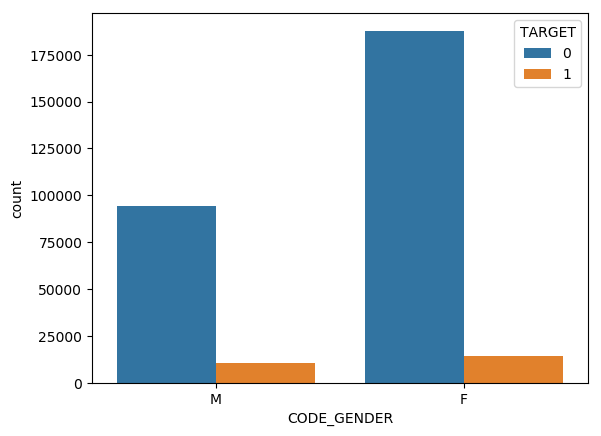

In [34]:
sns.countplot(x='CODE_GENDER',hue='TARGET',data=df)

In [35]:
genderCategories0 = pd.DataFrame(df0['CODE_GENDER'].value_counts().rename("Count_0").reset_index())
genderCategories0_perct = pd.DataFrame(df0['CODE_GENDER'].value_counts(normalize=True).rename("Perct_0").reset_index())
genderCategories0.rename(columns={"index":"CODE_GENDER"})
genderCategories0_perct.rename(columns={"index":"CODE_GENDER"})

#Merging data to get the overall view of the variable "NAME_INCOME_TYPE"
genderCategories0 = pd.merge(genderCategories0,genderCategories0_perct,how="inner").rename(columns={"index":"CODE_GENDER"})
genderCategories0

genderCategories1 = pd.DataFrame(df1['CODE_GENDER'].value_counts().rename("Count_1").reset_index())
genderCategories1_perct = pd.DataFrame(df1['CODE_GENDER'].value_counts(normalize=True).rename("Perct_1").reset_index())
genderCategories1.rename(columns={"index":"CODE_GENDER"})
genderCategories1_perct.rename(columns={"index":"CODE_GENDER"})

#Merging data to get the overall view of the variable "NAME_INCOME_TYPE"
genderCategories1 = pd.merge(genderCategories1,genderCategories1_perct,how="inner").rename(columns={"index":"CODE_GENDER"})
genderCategories1

genderCategories = pd.merge(genderCategories0,genderCategories1,how="inner").rename(columns={"index":"CODE_GENDER"})

def gender_percentage_contri_0(count_0, count_1):
    return 100*(count_0/(count_0+count_1))

def gender_percentage_contri_1(count_0, count_1):
    return 100*(count_1/(count_0+count_1))

genderCategories['percentage_contri_0'] = genderCategories[['Count_0','Count_1']].apply(lambda x: gender_percentage_contri_0(*x), axis=1)
genderCategories['percentage_contri_1'] = genderCategories[['Count_0','Count_1']].apply(lambda x: gender_percentage_contri_1(*x), axis=1)
genderCategories.set_index("CODE_GENDER",inplace=True)
genderCategories

,Count_0,Perct_0,Count_1,Perct_1,percentage_contri_0,percentage_contri_1
CODE_GENDER,,,,,,
F,187819,0.665841,14131,0.570419,93.002723,6.997277
M,94259,0.334159,10642,0.429581,89.855197,10.144803


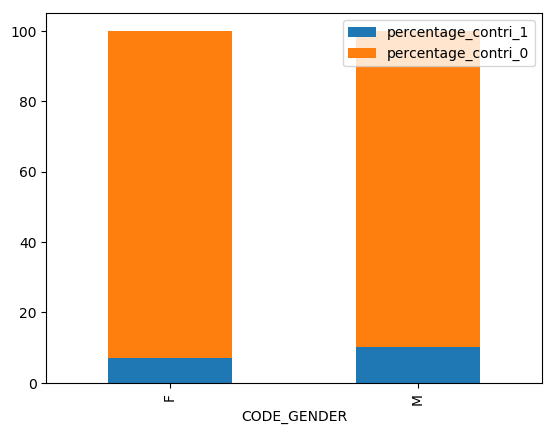

In [36]:
plt.rcParams.update(plt.rcParamsDefault)
genderCategories = genderCategories.sort_values(by='percentage_contri_1')
genderCategories[['percentage_contri_1', 'percentage_contri_0']].plot(kind='bar', stacked=True)

## Analysis:

Out of all the Females who have applied, 93% of them have repayed their loan and 7% of them  are defaulters.

And if a male candidate applies, there is a 10% chance that he will default.

<b> Gender can decrease the total % of "defaulters" by -3.24%. 
 We can say that Females are likely to repay their loans on time

## 2.1.2 Univariate Analysis for Numerical Variable
        o	Need to check: mean, median, mode, min, max,range, quantiles, standard deviation.
        o	Plots: Distribution, histogram, Box Plots


In [37]:
df1['CREDIT_RATINGS'].describe()

count    24773.000000
mean         0.410935
std          0.213107
min          0.000005
25%          0.238568
50%          0.440381
75%          0.594190
max          0.811870
Name: CREDIT_RATINGS, dtype: float64

In [38]:
df0['CREDIT_RATINGS'].describe()

count    2.820780e+05
mean     5.234787e-01
std      1.862767e-01
min      8.170000e-08
25%      4.097866e-01
50%      5.739047e-01
75%      6.677051e-01
max      8.549997e-01
Name: CREDIT_RATINGS, dtype: float64

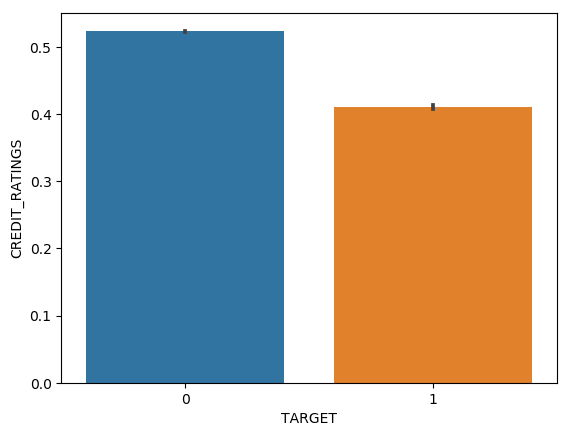

In [39]:
sns.barplot(x="TARGET",y="CREDIT_RATINGS",data=df)

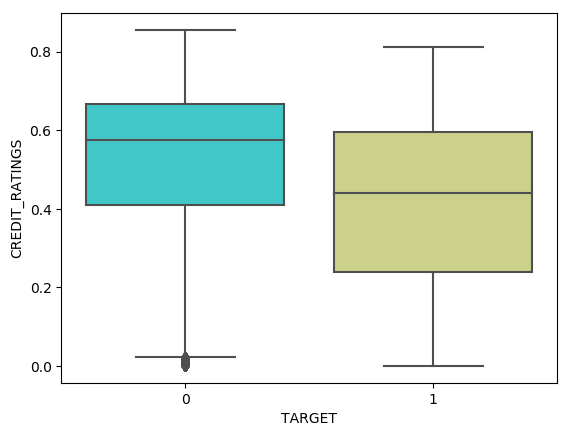

In [40]:
sns.boxplot(x="TARGET", y="CREDIT_RATINGS", data=df,palette='rainbow')

<b>Quick Analysis: </b>
The median of credit ratings of defaulters tends to be lower than that of non defaulter applicants.
As we see that upper quantile of defaulters overlaps with the lower quantile of non defaulters, they still have tendency to repay but are defaulting. Therefore credit rating is not the only factor affecting the rate of defaulters. We need to consider other factors also.

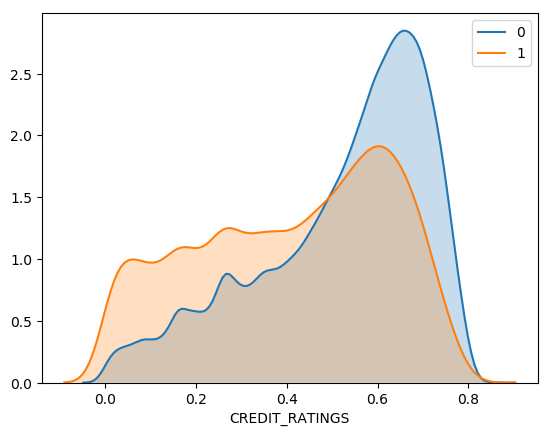

In [41]:
target =[0,1]
for i in target:
    subset = df[df['TARGET'] == i]
    sns.distplot(subset['CREDIT_RATINGS'],hist=False,kde=True,kde_kws ={'shade':True},label=i)

Distribution of '0' is skewed. Applicants with high credit ratings, tends to repay their loan.
Applicants with lower credit score tends to have a larger defaulter rate. 

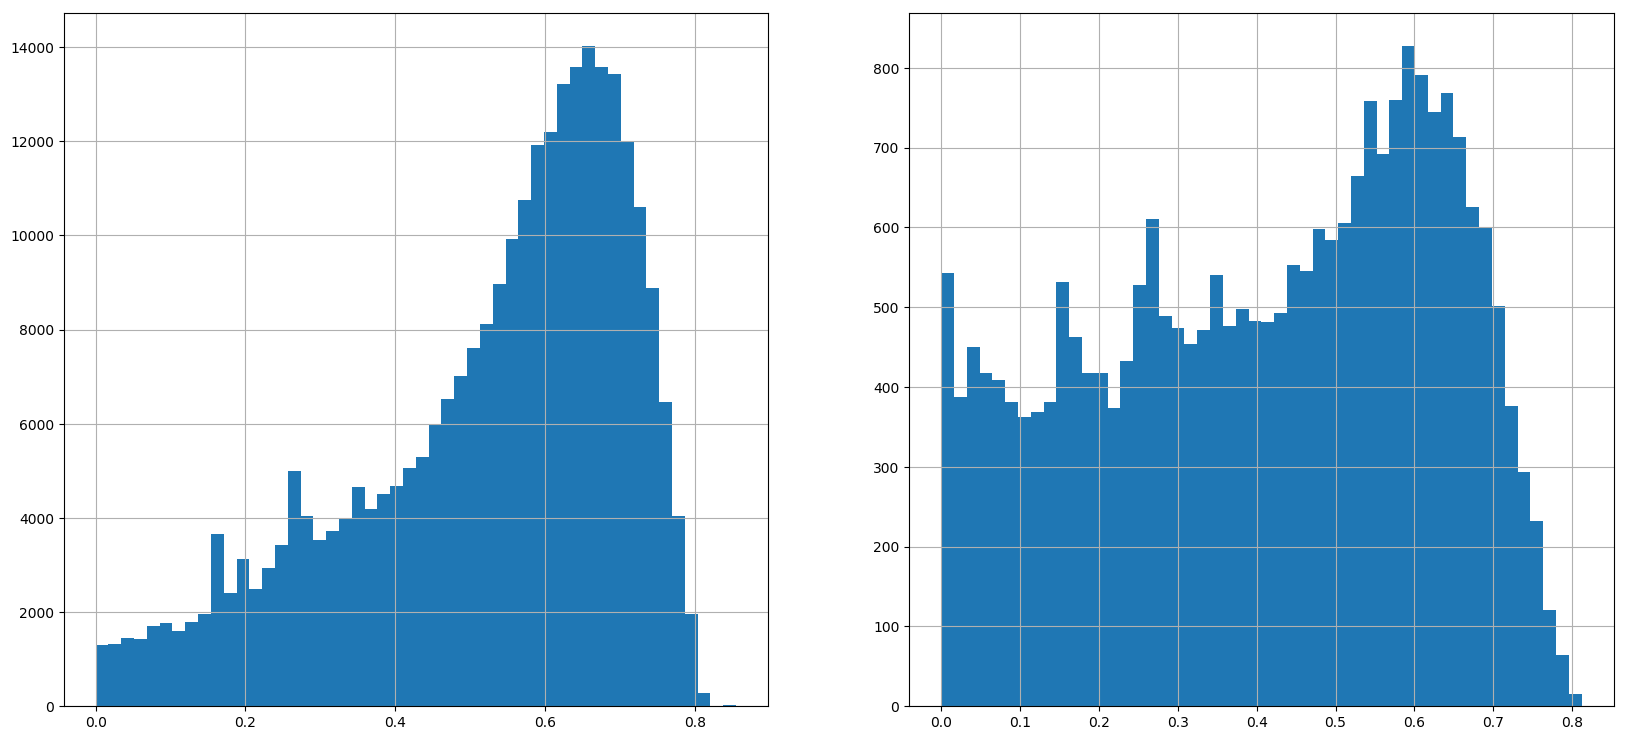

In [42]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
df0['CREDIT_RATINGS'].hist(bins = 50)
plt.subplot(1,2,2)
df1['CREDIT_RATINGS'].hist(bins = 50)

<b> Quick Analysis</b>

    There are more random peeks to be observed in above plot with target = 1 as compared to those with Target= 0. 
    The detailed analysis of categories of credit rating will be done in segmented univariate analaysis with CREDIT_CATEGORY

Next step is to check the various categories of credit ratings CREDIT_CATEGORY. (We previously binned the credit ratings into categories C1,C3,C3,C4 with C1 being the highest.

In [43]:
df['CREDIT_CATEGORY'].value_counts()

C3    92054
C2    92054
C1    61373
C4    61370
Name: CREDIT_CATEGORY, dtype: int64

In [44]:
creditCategories0 = pd.DataFrame(df0['CREDIT_CATEGORY'].value_counts().rename("Count_0").reset_index())
creditCategories0_perct = pd.DataFrame(df0['CREDIT_CATEGORY'].value_counts(normalize=True).rename("Perct_0").reset_index())
creditCategories0.rename(columns={"index":"CREDIT_CATEGORY"})
creditCategories0_perct.rename(columns={"index":"CREDIT_CATEGORY"})

#Merging data to get the overall view of the variable "NAME_INCOME_TYPE"
creditCategories0 = pd.merge(creditCategories0,creditCategories0_perct,how="inner").rename(columns={"index":"CREDIT_CATEGORY"})
creditCategories0

creditCategories1 = pd.DataFrame(df1['CREDIT_CATEGORY'].value_counts().rename("Count_1").reset_index())
creditCategories1_perct = pd.DataFrame(df1['CREDIT_CATEGORY'].value_counts(normalize=True).rename("Perct_1").reset_index())
creditCategories1.rename(columns={"index":"CREDIT_CATEGORY"})
creditCategories1_perct.rename(columns={"index":"CREDIT_CATEGORY"})

#Merging data to get the overall view of the variable "NAME_INCOME_TYPE"
creditCategories1 = pd.merge(creditCategories1,creditCategories1_perct,how="inner").rename(columns={"index":"CREDIT_CATEGORY"})
creditCategories1

creditCategories = pd.merge(creditCategories0,creditCategories1,how="inner").rename(columns={"index":"CREDIT_CATEGORY"})

def credit_percentage_contri_0(count_0, count_1):
    return 100*(count_0/(count_0+count_1))

def credit_percentage_contri_1(count_0, count_1):
    return 100*(count_1/(count_0+count_1))

creditCategories['percentage_contri_0'] = creditCategories[['Count_0','Count_1']].apply(lambda x: credit_percentage_contri_0(*x), axis=1)
creditCategories['percentage_contri_1'] = creditCategories[['Count_0','Count_1']].apply(lambda x: credit_percentage_contri_1(*x), axis=1)
creditCategories.set_index("CREDIT_CATEGORY",inplace=True)
creditCategories

,Count_0,Perct_0,Count_1,Perct_1,percentage_contri_0,percentage_contri_1
CREDIT_CATEGORY,,,,,,
C2,86719,0.307429,5335,0.215355,94.204489,5.795511
C3,84154,0.298336,7900,0.318896,91.418081,8.581919
C1,59172,0.209772,2201,0.088847,96.413732,3.586268
C4,52033,0.184463,9337,0.376902,84.785726,15.214274


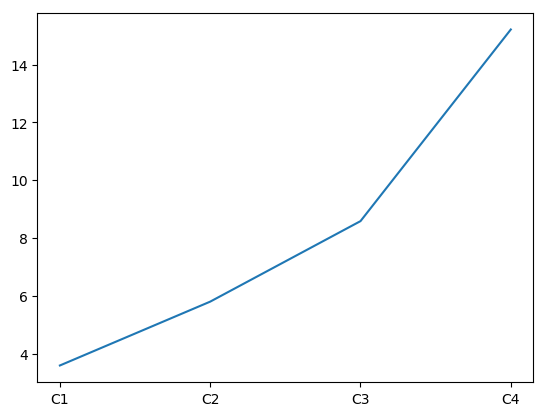

In [45]:
plt.plot(creditCategories['percentage_contri_1'].sort_values())

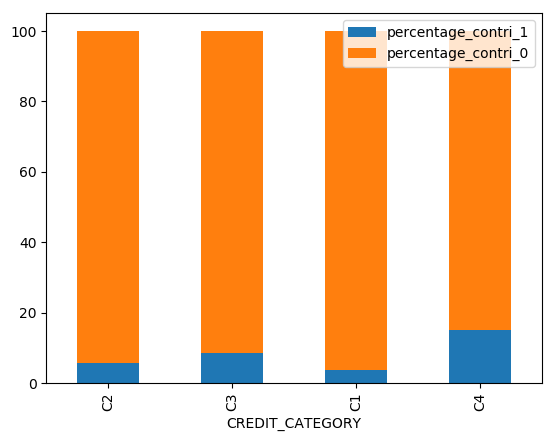

In [46]:
creditCategories[['percentage_contri_1', 'percentage_contri_0']].plot(kind='bar', stacked=True)

  <b>Analysis</b>:
  
    There tends to be a inverse relationship between the credit rating and the defaulters, with C1 being the highest credit rating group, there are less percentage of defaulters.

    If we consider an applicant from C1 category credit rating, there is only 3.5% chance that he will be a defaulter and if we consider an applicant with C4 category, there is 15% chance that he will be a defaulter.

    Therefore the credit rating can decrease the percentage of defaulters by (15%- 3.5%) 11.5%.
    So if we want to consider applicants, applicants with higher credit ratings should be given the highest priority.

## 2.2 Bivariate Analysis 
Done to check the impact of two independent variables on a dependent variable.

   ## 2.2.1 Categorical  & Categorical
        o	Need to check: Counts/Count% 
        o	Plots: Bar chart, Stacked bar chart, 2-y Axis plot – line charts 


In [47]:
pt = df.pivot_table(columns='NAME_INCOME_TYPE',index='CREDIT_CATEGORY',values='TARGET',aggfunc='sum',fill_value = 0)
#pt.reset_index()

pt

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
CREDIT_CATEGORY,,,,,,,,
C1,0,629,0,288,140,0,1,1143
C2,0,1304,0,621,281,0,1,3128
C3,0,1639,1,921,395,0,1,4943
C4,0,1779,1,1145,431,0,5,5976


In [48]:
pt['Row_Total'] = pt['Businessman'] + pt['Commercial associate'] + pt['Maternity leave'] + pt['Pensioner']+pt['State servant'] +pt['Student']+pt['Unemployed']+pt['Working']

In [49]:
Column_Total = []
for c in pt.columns:
    Column_Total.append(pt[c].sum())
Column_Total
pt.loc['Column_Total'] = Column_Total
pt

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Row_Total
CREDIT_CATEGORY,,,,,,,,,
C1,0,629,0,288,140,0,1,1143,2201
C2,0,1304,0,621,281,0,1,3128,5335
C3,0,1639,1,921,395,0,1,4943,7900
C4,0,1779,1,1145,431,0,5,5976,9337
Column_Total,0,5351,2,2975,1247,0,8,15190,24773


In [50]:
for i in pt.index:
    pt.loc[i,'Total%'] = 100*(pt.loc[i,'Row_Total']/pt.loc['Column_Total','Row_Total'])

for j in df.NAME_INCOME_TYPE.unique():
    for i in pt.index:
        pt.loc[i,j+'%'] = 100*(pt.loc[i,j]/pt.loc['Column_Total',j])
pt

NAME_INCOME_TYPE,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working,Row_Total,Total%,Working%,State servant%,Commercial associate%,Pensioner%,Unemployed%,Student%,Businessman%,Maternity leave%
CREDIT_CATEGORY,,,,,,,,,,,,,,,,,,
C1,0,629,0,288,140,0,1,1143,2201,8.884673,7.524687,11.226945,11.754812,9.680672,12.5,NaN,NaN,0.0
C2,0,1304,0,621,281,0,1,3128,5335,21.535543,20.592495,22.534082,24.369277,20.873950,12.5,NaN,NaN,0.0
C3,0,1639,1,921,395,0,1,4943,7900,31.889557,32.541145,31.676022,30.629789,30.957983,12.5,NaN,NaN,50.0
C4,0,1779,1,1145,431,0,5,5976,9337,37.690227,39.341672,34.562951,33.246122,38.487395,62.5,NaN,NaN,50.0
Column_Total,0,5351,2,2975,1247,0,8,15190,24773,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,NaN,NaN,100.0


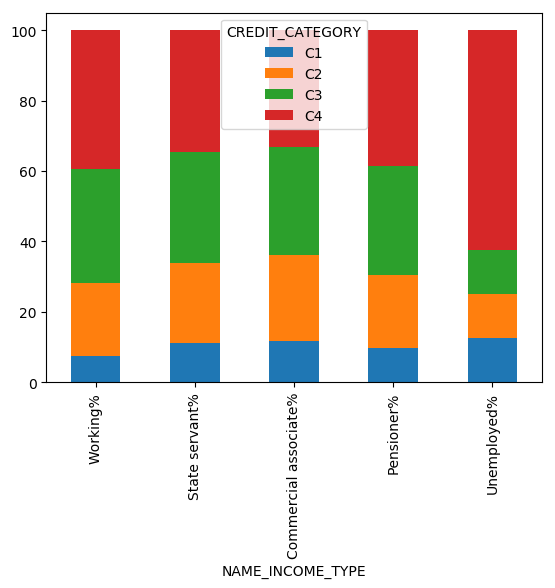

In [51]:
credit_income_type = pt.iloc[0:-1][['Working%','State servant%','Commercial associate%','Pensioner%','Unemployed%']]
credit_income_type
credit_income_type.T.plot.bar(stacked = 'TRUE')

    Analysis:
    Of all the C1 credit rating category applicants, the maximum percentage of defaulters are 'Commmercial Associates'
    The Percentage of applicants with income type as 'working' and with C1 credit rating is the lowest in all the defaulters.
    

## 2.2.2 Numerical & Numerical

    o	Need to check: correlations
    o	Plots: heatmaps, scatter plots, hex plots


In [52]:
df1_corr=df[df['TARGET']==1]
df0_corr=df[df['TARGET']==0]

df1_corr=df1_corr[[
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'AGE',
'DAYS_EMPLOYED']]

df0_corr=df0_corr[[
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'AGE',
'DAYS_EMPLOYED']]

df1_corr_matrix=df1_corr.corr()
df0_corr_matrix=df1_corr.corr()
df1_corr_matrix

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000000,0.038071,0.046357,0.037527,-0.003076,-0.014947
AMT_CREDIT,0.038071,1.000000,0.752045,0.982710,0.135634,-0.000746
AMT_ANNUITY,0.046357,0.752045,1.000000,0.752078,0.014558,-0.082332
AMT_GOODS_PRICE,0.037527,0.982710,0.752078,1.000000,0.136039,0.003773
AGE,-0.003076,0.135634,0.014558,0.136039,1.000000,0.574990
DAYS_EMPLOYED,-0.014947,-0.000746,-0.082332,0.003773,0.574990,1.000000


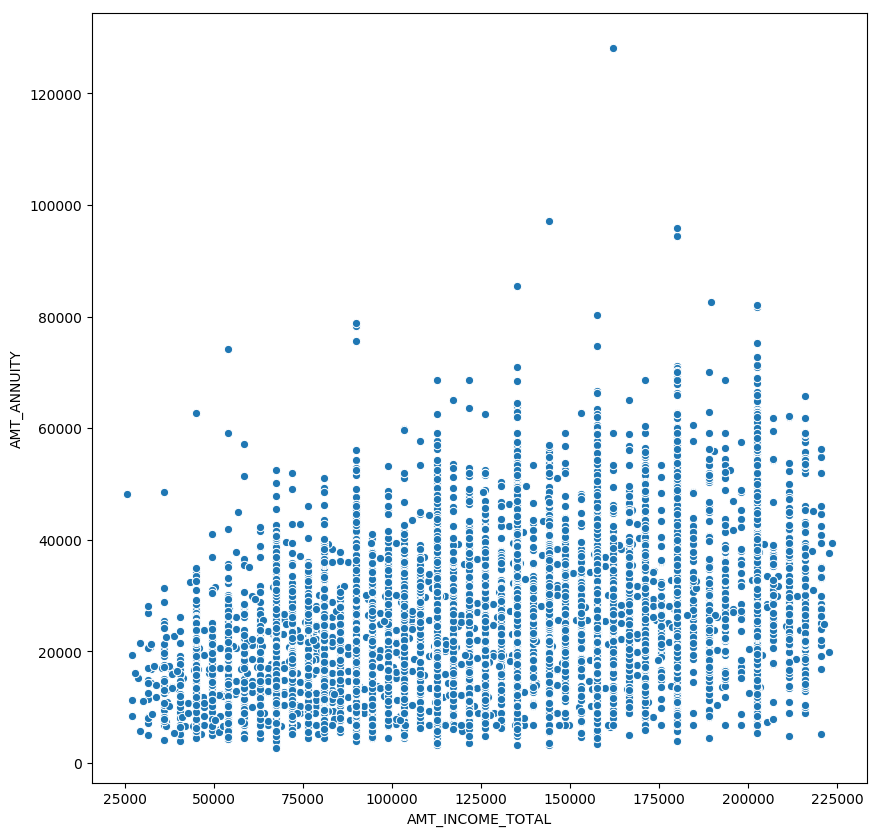

In [53]:

#narrowing down the data and considering less than the upper quantile AMT_INCOME_TOTAL
df1_corr['AMT_INCOME_TOTAL'] = df1_corr[df1_corr['AMT_INCOME_TOTAL']<df1_corr['AMT_INCOME_TOTAL'].quantile(.85)]['AMT_INCOME_TOTAL']
#df1_corr['AMT_ANNUITY'] = df1_corr[df1_corr['AMT_GOODS_PRICE']<df1_corr['AMT_GOODS_PRICE'].quantile(.85)]['AMT_GOODS_PRICE']

fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY',data=df1_corr)

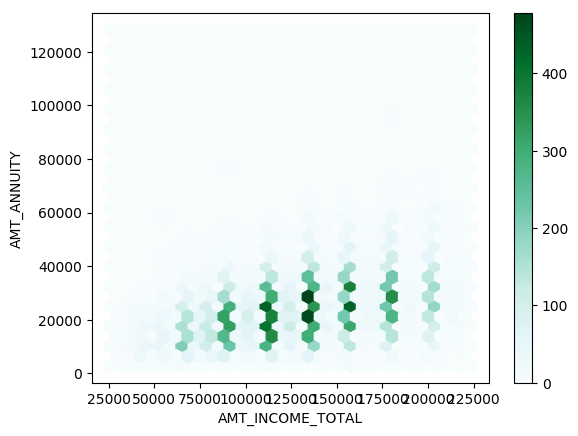

In [54]:
df1_corr.plot.hexbin(x='AMT_INCOME_TOTAL', y='AMT_ANNUITY', gridsize=30)

**Analysis:
> From the above hexplot we can see that large number of application lie in the region where amount annuity tends to be between 20% to 30% of the applicants income
    

In [55]:
#narrowing down the data and considering less than the upper quantile AMT_INCOME_TOTAL
df1_corr['AMT_CREDIT'] = df1_corr[df1_corr['AMT_CREDIT']<df1_corr['AMT_CREDIT'].quantile(.85)]['AMT_CREDIT']
#df1_corr['AMT_ANNUITY'] = df1_corr[df1_corr['AMT_GOODS_PRICE']<df1_corr['AMT_GOODS_PRICE'].quantile(.85)]['AMT_GOODS_PRICE']

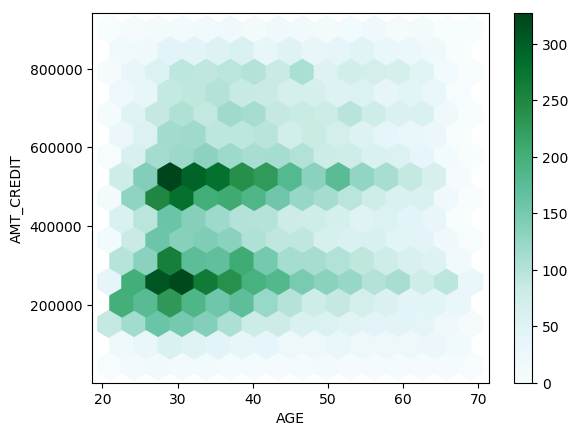

In [56]:
df1_corr.plot.hexbin(x='AGE', y='AMT_CREDIT', gridsize=15)

 **Analysis:
>    From the above hexplot we can see that applicants with age 28 to 37 tend to get the larger amount of credit as compared to older applicants. We can easily confirm this with the following box plot.
    

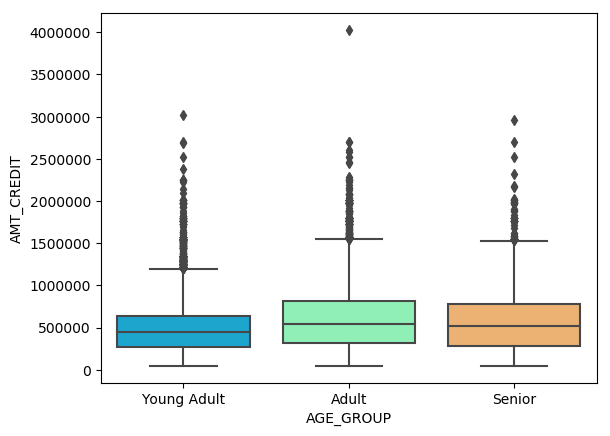

In [57]:
sns.boxplot(x="AGE_GROUP", y="AMT_CREDIT", data=df1,palette='rainbow')

The median of AMT_CREDIT tends to highest in Adults and lowest in Young Adults. 

<b>Finding correlations and heatmaps for all the continous variables in your data. Follow the below steps to calculate correlations between all the numerical variables in the data.


In [58]:
df1_corrdf = df1_corr_matrix.where(np.triu(np.ones(df1_corr_matrix.shape),k=1).astype(np.bool))
df0_corrdf = df0_corr_matrix.where(np.triu(np.ones(df0_corr_matrix.shape),k=1).astype(np.bool))

In [59]:
df1_corrdf = df1_corrdf.unstack().reset_index()
df0_corrdf = df0_corrdf.unstack().reset_index()

In [60]:
df1_corrdf.columns =['var1','var2','correlation']
df0_corrdf.columns=['var1','var2','correlation']

In [61]:
df1_corrdf.dropna(subset=['correlation'],inplace=True)
df0_corrdf.dropna(subset=['correlation'],inplace=True)

In [62]:
df1_corrdf.sort_values(by=['correlation'],ascending=False)
#df0_corrdf.sort_values(by=['correlation'],ascending=False)

,var1,var2,correlation
19,AMT_GOODS_PRICE,AMT_CREDIT,0.982710
20,AMT_GOODS_PRICE,AMT_ANNUITY,0.752078
13,AMT_ANNUITY,AMT_CREDIT,0.752045
34,DAYS_EMPLOYED,AGE,0.574990
27,AGE,AMT_GOODS_PRICE,0.136039
25,AGE,AMT_CREDIT,0.135634
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046357
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.038071
18,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037527
26,AGE,AMT_ANNUITY,0.014558


**Analysis:**
> From the above table we can easily see that AMT_GOODS_PRICE and  AMT_CREDIT have the highest corelation, which is quite obvious as higher the good price, higher will be the loan value.
    

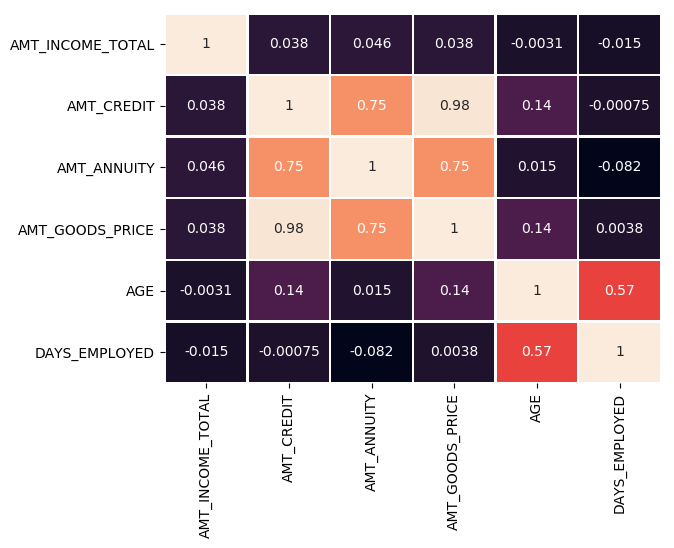

In [63]:
sns.heatmap(df1_corr_matrix,annot=True,linewidth=1,annot_kws={"size":10},cbar=False)

## 2.2.3 Categorical & Numerical
   * Plots: Box plots, line chart


In [64]:
#removing outlier for AMT_INCOME_TOTAL
df1_filtered = df1[df1['AMT_INCOME_TOTAL']<df['AMT_INCOME_TOTAL'].quantile(.90)]
df_stats_credit = df1_filtered.groupby('NAME_INCOME_TYPE').mean()[['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']]
#df_stats_credit = df1_filtered.groupby('AGE_GROUP').mean()[['CREDIT_RATINGS']]
df_stats_credit.sort_values(by='AMT_CREDIT',ascending=False)

,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_GOODS_PRICE
NAME_INCOME_TYPE,,,
Maternity leave,929250.000000,58500.000000,929250.000000
Unemployed,626625.000000,72000.000000,626625.000000
State servant,592911.453982,143417.612389,521987.337345
Commercial associate,557811.942329,153699.057111,486953.941948
Pensioner,540610.251603,123811.564103,477430.221581
Working,515842.766155,140228.437782,450493.697045


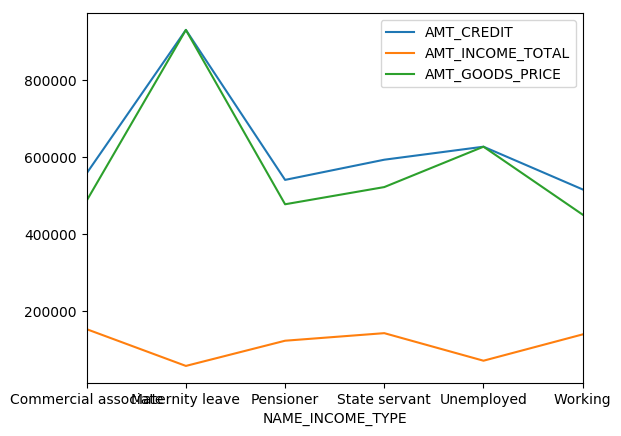

In [65]:
df_stats_credit.plot.line(x_compat=True)

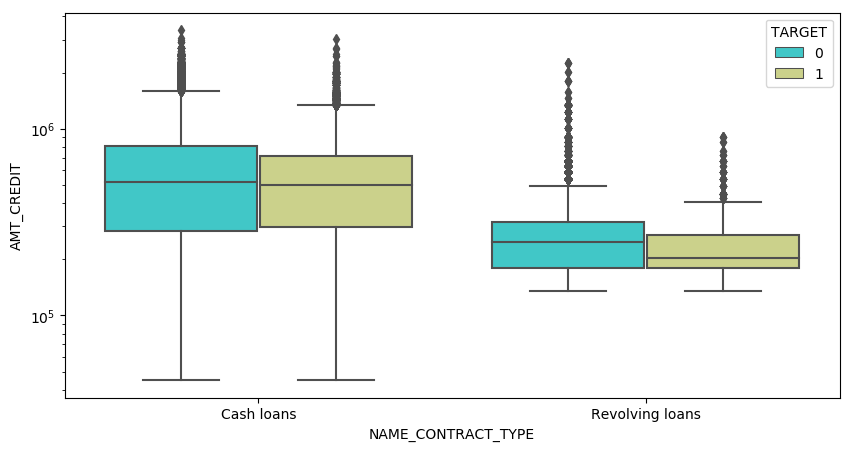

In [66]:
plt.figure(figsize=(10,5))
df_filtered = df[df['AMT_INCOME_TOTAL']<df['AMT_INCOME_TOTAL'].quantile(.90)]

sns.boxplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=df_filtered,palette='rainbow',hue='TARGET')
plt.yscale("log")

**Analysis:** 

From the above box plots,we can infer that people with defaulting intentions tend to take less credit of revolving loans as revolving loans involve repayment and then reusing it.
Hence, we can deduce that more scrunity can be put in place for cash loans as against to Revolving loans.